In [1]:
import dask.dataframe as ddf
import pandas as pd

df = ddf.read_csv("/Users/jianhongxu/python_project/twitter_dataset/combined_user.csv").compute()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546424 entries, 0 to 383603
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   class                 1546424 non-null  object
 1   tweet_id              1546424 non-null  int64 
 2   day                   1546424 non-null  object
 3   time                  1546424 non-null  object
 4   tweet                 1546424 non-null  object
 5   tweet_favorite_count  1546424 non-null  int64 
 6   tweet_retweet_count   1546424 non-null  int64 
 7   tweet_source          1546424 non-null  object
 8   user_id               1546424 non-null  int64 
 9   user_followers_count  1546424 non-null  int64 
 10  user_friends_count    1546424 non-null  int64 
 11  user_listed_count     1546424 non-null  int64 
 12  user_statuses_count   1546424 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 165.2+ MB


In [2]:
df.columns

Index(['class', 'tweet_id', 'day', 'time', 'tweet', 'tweet_favorite_count',
       'tweet_retweet_count', 'tweet_source', 'user_id',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_statuses_count'],
      dtype='object')

In [3]:
df['class'].value_counts()

class
ADHD          1009002
DEPRESSION     336997
BIPOLAR        200425
Name: count, dtype: int64

In [4]:
df['tweet'] = df['tweet'].astype(str)

In [5]:
df = df.drop(columns=['tweet_id'])

In [6]:
df.drop_duplicates(subset='tweet',inplace=True)
df['class'].value_counts()

class
ADHD          975609
DEPRESSION    321430
BIPOLAR       192217
Name: count, dtype: int64

In [18]:
def word_count(text):
    if isinstance(text,str):
        return len(text.split())
    return 0

df['text_len'] = df['tweet'].apply(word_count)

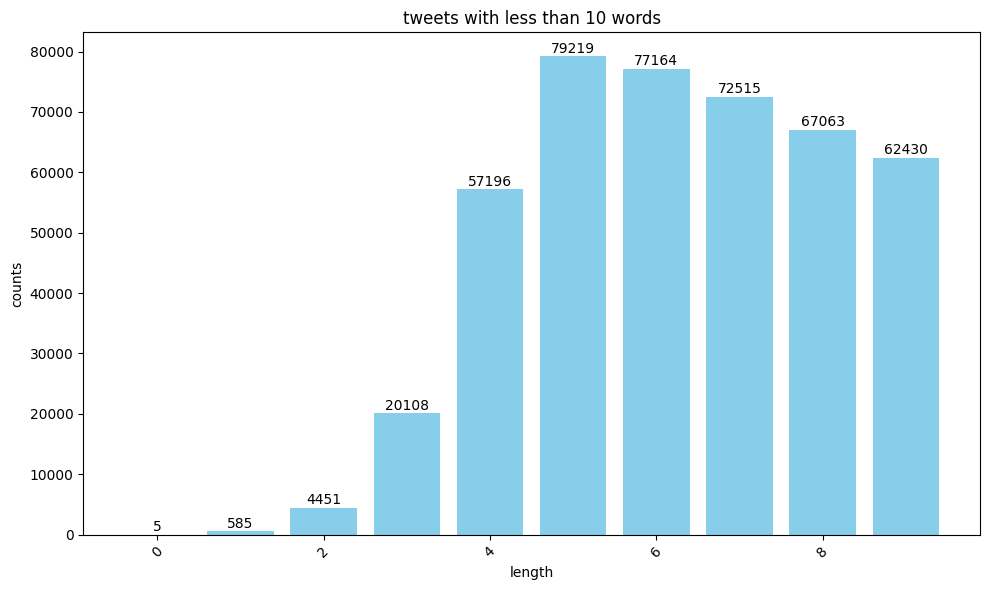

In [19]:
import matplotlib.pyplot as plt
text_num = df['text_len'].value_counts().reset_index(name='counts')

df_filtered = text_num[text_num['text_len']<10]

plt.figure(figsize=(10,6))
bars =plt.bar(df_filtered['text_len'], df_filtered['counts'], color='skyblue')

plt.xlabel('length')
plt.ylabel('counts')
plt.title('tweets with less than 10 words')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+50,yval,ha='center',va='bottom')
plt.show()

In [20]:
df = df[df['text_len']>4]

In [21]:
df['class'].value_counts()

class
ADHD          826446
DEPRESSION    264888
BIPOLAR       159829
Name: count, dtype: int64

In [ ]:
# !pip install tweet-preprocessor

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import re 
import emoji
import preprocessor as p
def tweetPreprocessing(text):
    text = p.clean(text)

    text = re.sub(r'https?://[^ ]+', '',text) # remove URLS

    text = re.sub(r'@[^ ]+', '', text) # remove usernames

    text = re.sub(r'#','', text) # remove Hashtags

    text = re.sub(r'([A-Za-z])\1{2,}', r'\1',text) #Character normalization

    text = re.sub(r' 0 ', 'zero', text) #Punctuation, speical characters and numbers
    text = re.sub(r'[^A-Za-z ]', '', text)

    text = text.lower()

    return text

tweet = "Going live on twitch @USER"
print(tweet)
print(tweetPreprocessing(tweet))

Going live on twitch @USER
going live on twitch


In [12]:
df['tweet'] = df['tweet'].apply(tweetPreprocessing)

In [22]:
df.drop_duplicates(subset='tweet', inplace=True)
df['class'].value_counts()

class
ADHD          826446
DEPRESSION    264888
BIPOLAR       159829
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251163 entries, 0 to 383603
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   class                 1251163 non-null  object
 1   day                   1251163 non-null  object
 2   time                  1251163 non-null  object
 3   tweet                 1251163 non-null  object
 4   tweet_favorite_count  1251163 non-null  int64 
 5   tweet_retweet_count   1251163 non-null  int64 
 6   tweet_source          1251163 non-null  object
 7   user_id               1251163 non-null  int64 
 8   user_followers_count  1251163 non-null  int64 
 9   user_friends_count    1251163 non-null  int64 
 10  user_listed_count     1251163 non-null  int64 
 11  user_statuses_count   1251163 non-null  int64 
 12  text_len              1251163 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 133.6+ MB


In [24]:
for t in df['tweet'].sample(1):
    print(t)

 i do not know what this womans problem is


# based on user_id choose the same counts 

In [25]:
df['user_id'].value_counts()

user_id
1175314218431733761    3030
1380245216             3014
1322667412278435840    3009
3208811578             2984
825418022735056896     2984
                       ... 
115667527                20
3315206733               18
2587045081               16
1200889728989564928      15
1254190156015378437      12
Name: count, Length: 1007, dtype: int64

In [26]:
user_counts = df['user_id'].value_counts().rename('count').reset_index().rename(columns={'index': 'user_id'})
user_labels = df.groupby('user_id')['class'].unique().reset_index()
result = user_counts.merge(user_labels, on='user_id')
print(result)

                  user_id  count         class
0     1175314218431733761   3030  [DEPRESSION]
1              1380245216   3014  [DEPRESSION]
2     1322667412278435840   3009        [ADHD]
3              3208811578   2984  [DEPRESSION]
4      825418022735056896   2984  [DEPRESSION]
...                   ...    ...           ...
1002            115667527     20     [BIPOLAR]
1003           3315206733     18        [ADHD]
1004           2587045081     16     [BIPOLAR]
1005  1200889728989564928     15  [DEPRESSION]
1006  1254190156015378437     12        [ADHD]

[1007 rows x 3 columns]


In [49]:
result[result['class']=="ADHD"][:10]


,user_id,count,class
2,1322667412278435840,3009,[ADHD]
5,610904243,2974,[ADHD]
6,1044015721,2916,[ADHD]
7,3116120941,2901,[ADHD]
8,8481222,2897,[ADHD]
11,1275470856349577216,2862,[ADHD]
12,16225571,2851,[ADHD]
13,1326906926,2850,[ADHD]
14,10105352,2840,[ADHD]
18,2860978900,2776,[ADHD]


In [ ]:
# choose top 10 users for ADHD
adhd_df = df[df['user_id'].isin([1322667412278435840,610904243,1044015721,3116120941,8481222,1275470856349577216,
                                 16225571,1326906926,10105352,2860978900])]
adhd_df.shape

(28876, 13)

In [51]:
result[result['class']=='DEPRESSION'][:10]

,user_id,count,class
0,1175314218431733761,3030,[DEPRESSION]
1,1380245216,3014,[DEPRESSION]
3,3208811578,2984,[DEPRESSION]
4,825418022735056896,2984,[DEPRESSION]
9,904829002619244544,2893,[DEPRESSION]
15,17483462,2821,[DEPRESSION]
16,204473477,2787,[DEPRESSION]
27,2904288418,2722,[DEPRESSION]
29,1173999033800482816,2718,[DEPRESSION]
31,1345049171284393988,2697,[DEPRESSION]


In [ ]:
# choose top 10 users for depression
dep_df = df[df['user_id'].isin([1175314218431733761,1380245216,3208811578,825418022735056896,904829002619244544,
                                17483462,204473477,2904288418,1173999033800482816,1345049171284393988])]
dep_df.shape


(28650, 13)

In [50]:
result[result['class'] == 'BIPOLAR'][:11]

,user_id,count,class
10,227346403,2874,[BIPOLAR]
17,2961738842,2780,[BIPOLAR]
24,1148718901393592322,2745,[BIPOLAR]
36,485410546,2665,[BIPOLAR]
44,2697446893,2593,[BIPOLAR]
68,3299774128,2440,[BIPOLAR]
83,1185354669268373504,2373,[BIPOLAR]
85,408540390,2369,[BIPOLAR]
86,1252233854401671168,2367,[BIPOLAR]
93,604895537,2332,[BIPOLAR]


In [ ]:
# choose top 11 users for Bipolar
bip_df = df[df['user_id'].isin([227346403,2961738842,1148718901393592322,485410546,2697446893,3299774128,1185354669268373504,
                                408540390,1252233854401671168,604895537,231494618])]
bip_df.shape

(27857, 13)

In [52]:
merged_df = pd.concat([adhd_df,dep_df,bip_df], ignore_index=True)
merged_df['class'].value_counts()

class
ADHD          28876
DEPRESSION    28650
BIPOLAR       27857
Name: count, dtype: int64

In [55]:
merged_df = merged_df[['class','tweet']]

In [58]:
merged_df.to_csv('/Users/jianhongxu/python_project/twitter_dataset/cleaned_tweet_85k.csv',index=False)

## choose one user for each label

In [59]:

# user_id: 904829002619244544   counts:2893     DEPRESSION
# user_id: 227346403            counts:2874     BIPOLAR
# user_id: 8481222              counts:2897     ADHD
filtered_df = df[df['user_id'].isin([904829002619244544,227346403,8481222])]
filtered_df.shape

(8664, 13)

In [60]:
filtered_df['class'].value_counts()


class
ADHD          2897
DEPRESSION    2893
BIPOLAR       2874
Name: count, dtype: int64

In [ ]:
filtered_df['user_id'].value_counts()

user_id
8481222               2897
904829002619244544    2893
227346403             2874
Name: count, dtype: int64

In [244]:
filtered_df = filtered_df[['class','tweet']]

In [245]:
filtered_df.to_csv('/Users/jianhongxu/python_project/twitter_dataset/cleaned_tweet_9k.csv', index=False)

# save training datasets and test datasets

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/jianhongxu/python_project/twitter_dataset/cleaned_tweet_85k.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['tweet'], df['class'], test_size=0.2, random_state=42
)

# Training set
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('/Users/jianhongxu/python_project/twitter_dataset/data/train_dataset_85k.csv', index=False)

# Test set
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('/Users/jianhongxu/python_project/twitter_dataset/data/test_dataset_85k.csv', index=False)

